In [7]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import pathlib

config = {
    "data":{
        "transaction": "data/transaction.xlsx",
        "order": "data/002463.SZ.order.csv",
        "snap": "data/002463.SZ.snap.csv",
        "trade": "data/002463.SZ.trade.csv"
    }
}
trans_df = pd.read_excel(pathlib.Path(config["data"]["transaction"]))
order_df = pd.read_csv(pathlib.Path(config["data"]["order"]))
snap_df = pd.read_csv(pathlib.Path(config["data"]["snap"]))
trade_df = pd.read_csv(pathlib.Path(config["data"]["trade"]))

<!-- ![alt][src/f1.png] -->

<img src="src/f1.png" alt="alt" />

# 2-demension

<Axes: xlabel='Sale', ylabel='Density'>

d:\python\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 10.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


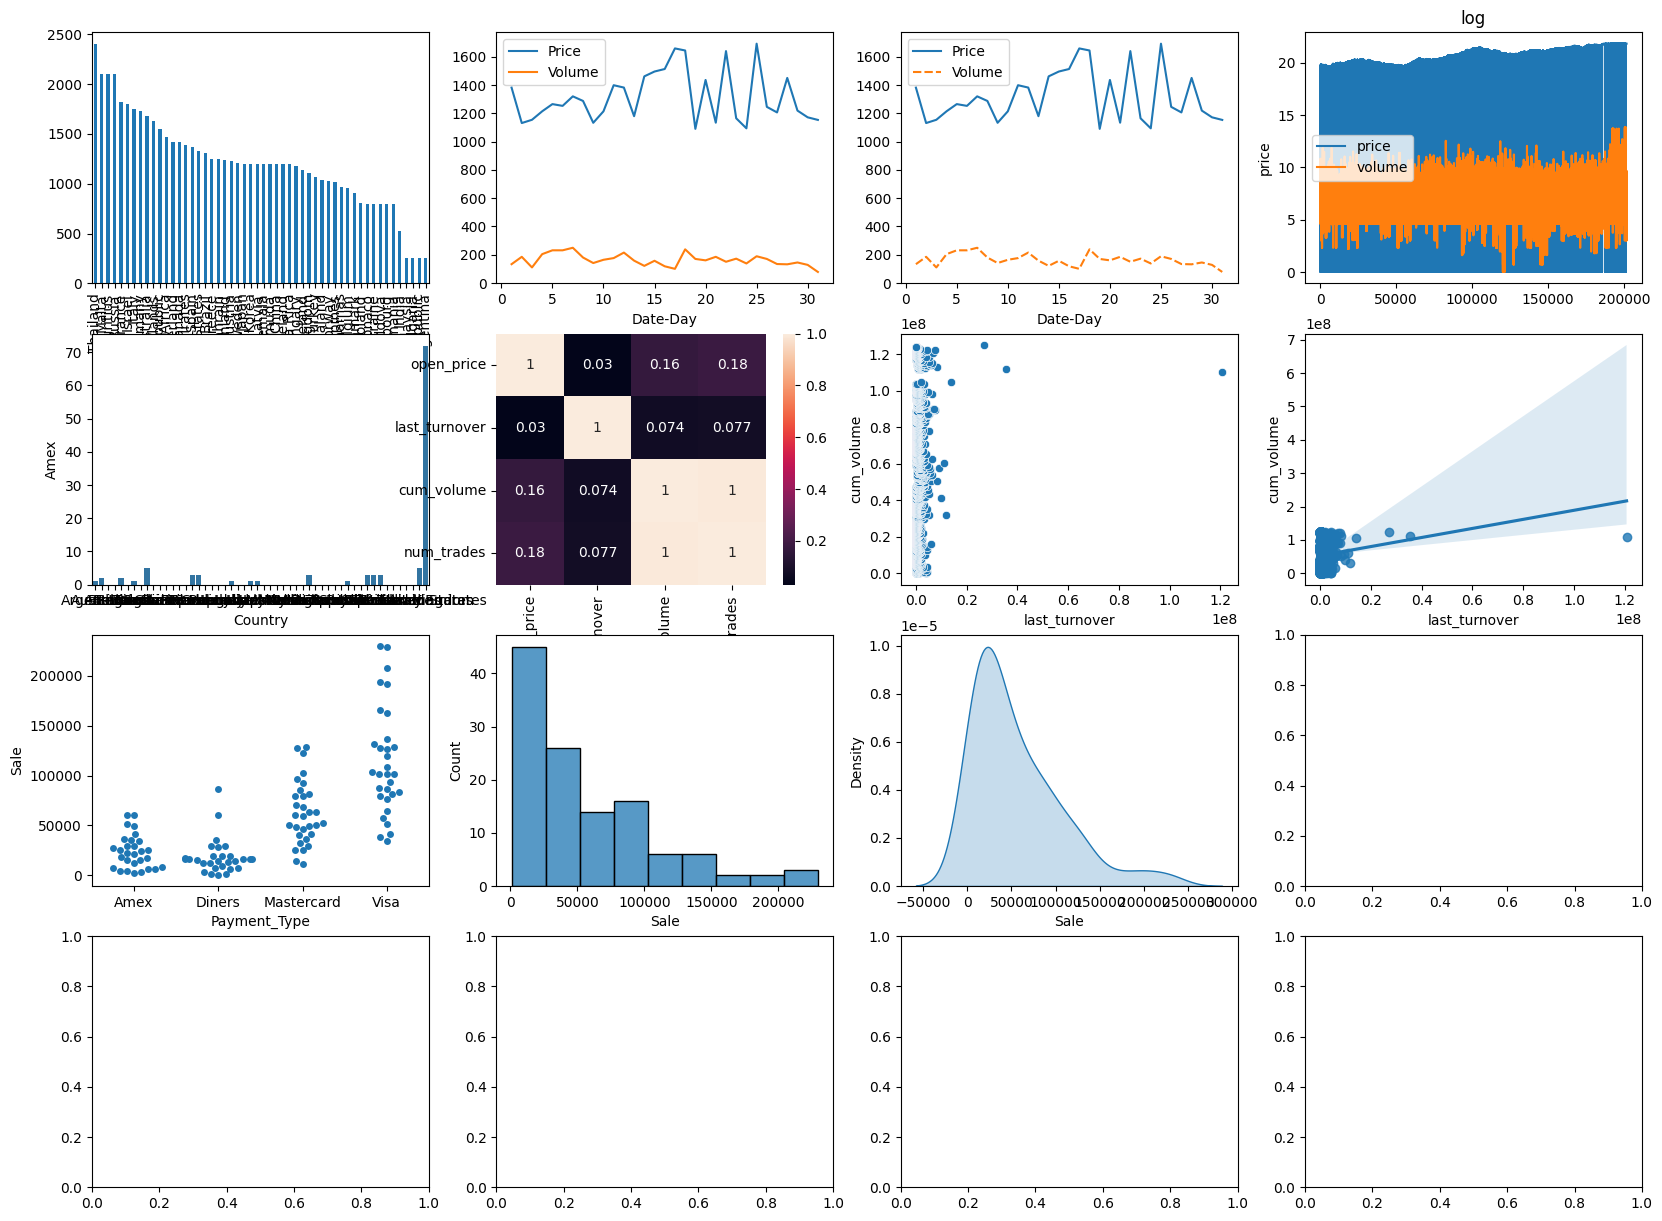

In [138]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20,15))

gen = (i for i in axes.reshape(-1) )

# bar plot 
# input: df  
df = trans_df.groupby(["Country"]).apply(lambda df:  np.nansum(df["Price"]*df["Volume"])/df["Volume"].sum() ) 
df.sort_values(ascending=False).plot.bar(ax=next(gen))


# # line plot 
# # input: df 
def f1(df):
    return(pd.Series({
        "Price": df['Price'].mean(),
        "Volume": df["Volume"].sum()
    }))
df = trans_df.groupby(["Date-Day"]).apply(f1)
df.plot.line(ax=next(gen))

# # line plot (sns)
# # input: df / series
sns.lineplot(data = df, ax=next(gen))


# # line plot (分段添加) 
# # input:df / series
ax=next(gen)
sns.lineplot(data=trade_df['price'], label="price", ax=ax)
sns.lineplot(data=np.log(trade_df['volume']), label="volume", ax=ax)
ax.set_title("log")

# # bar plot
# # input: x, y 
ax=next(gen)
df = trans_df.groupby(["Country"]).apply(lambda df: df["Payment_Type"].value_counts() ) 
df = df.unstack(["Payment_Type"])
sns.barplot(x=df.index, y=df["Amex"], ax=ax)


# # heat map 
# # input: df
ax=next(gen)
df = snap_df[["open_price", "last_turnover", "cum_volume", "num_trades"]].corr()
sns.heatmap(data = df, annot=True, ax=ax)


# # scatter plot
# # input: x, y 
ax=next(gen)
sns.scatterplot(x=snap_df['last_turnover'], y=snap_df['cum_volume'], ax=ax)


# # scatter regplot
# # input: x,y 
ax=next(gen)
sns.regplot(x=snap_df['last_turnover'], y=snap_df['cum_volume'], ax=ax)


# # scatter swarmplot
# # input: x,y 
ax=next(gen)
def f(df):
    return(pd.Series({
        "Price": df["Price"].mean(),
        "Sale": df["销售额"].sum(),
    }))
df = trans_df.groupby(["Date-Day","Payment_Type"]).apply(f)
df = df.reset_index()
sns.swarmplot(x=df["Payment_Type"],
              y=df["Sale"], ax=ax)

# # histplot
# # input: x (series)
ax=next(gen)
sns.histplot(x=df["Sale"], ax=ax)

# # densityplot
# # input: x (series)
ax=next(gen)
sns.kdeplot(x=df["Sale"], ax=ax, fill=True)




# 3-demension

Text(0.5, 1.0, 'kde+color')

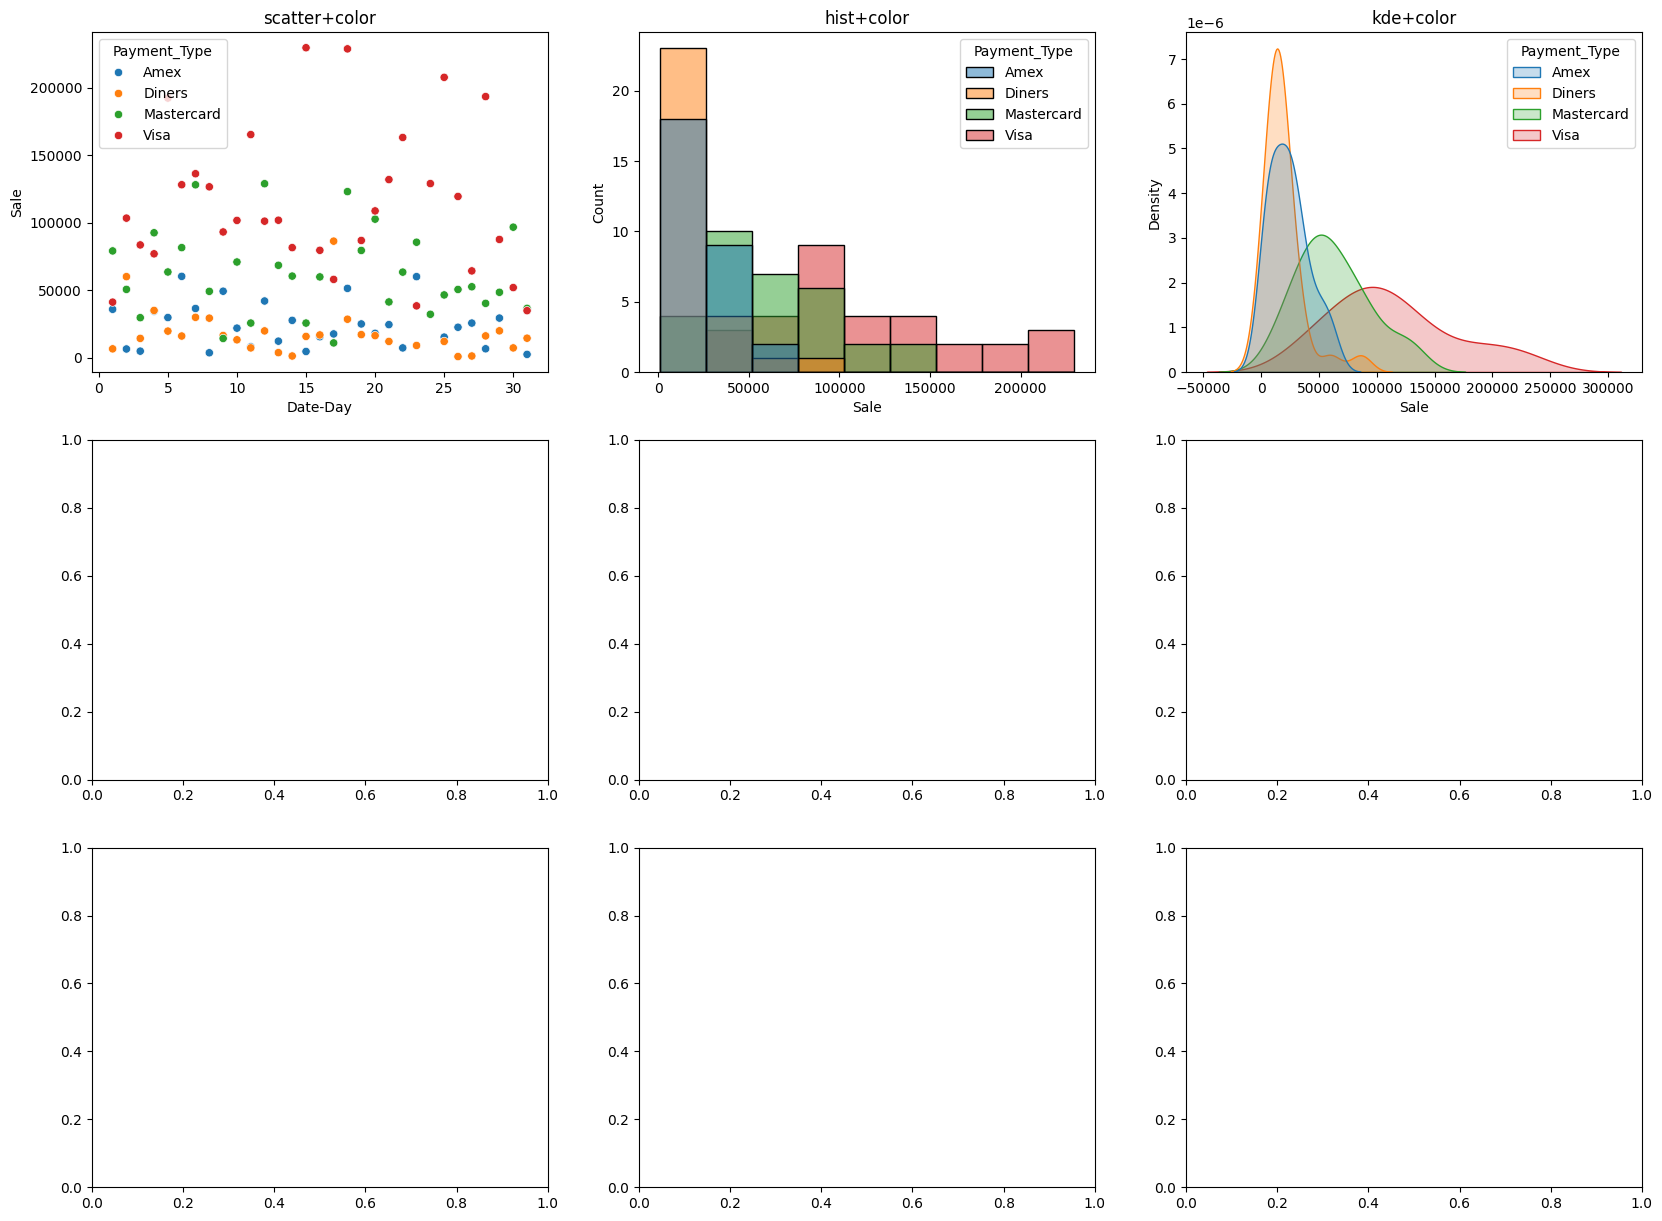

In [137]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,15))
gen = (i for i in axes.reshape(-1) )

# scatter plot + color 
# input: x, y, hue
def f(df):
    return(pd.Series({
        "Price": df["Price"].mean(),
        "Sale": df["销售额"].sum(),
    }))
df = trans_df.groupby(["Date-Day","Payment_Type"]).apply(f)
df = df.reset_index()
ax=next(gen)
sns.scatterplot(x=df["Date-Day"], y=df["Sale"], hue=df["Payment_Type"], ax=ax)
ax.set_title("scatter+color")

# # histplot + color
# # input: x (series)
ax=next(gen)
sns.histplot(x=df["Sale"], ax=ax, hue=df["Payment_Type"])
ax.set_title("hist+color")

# # densityplot + color
# # input: x (series)
ax=next(gen)
sns.kdeplot(x=df["Sale"], ax=ax, fill=True, hue=df["Payment_Type"])
ax.set_title("kde+color")

# Face-grid Plot

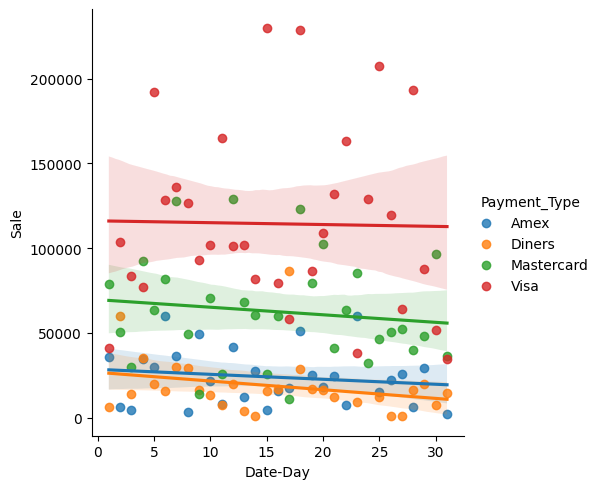

In [93]:
# lm/reg scatter plot + color 
g = sns.lmplot(data=df, x="Date-Day", y="Sale", hue="Payment_Type")

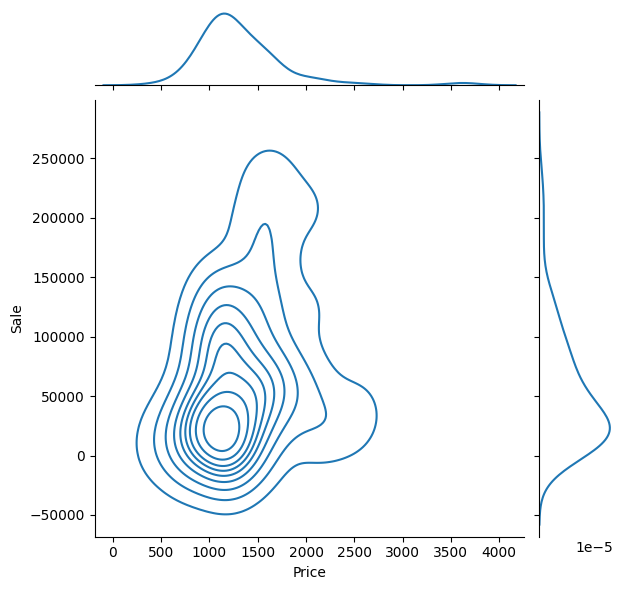

In [106]:
# 2D-densityplot
# input: x, y 
def f(df):
    return(pd.Series({
        "Price": df["Price"].mean(),
        "Sale": df["销售额"].sum(),
    }))
df = trans_df.groupby(["Date-Day","Payment_Type"]).apply(f)
df = df.reset_index()
sns.jointplot(x=df['Price'], y=df['Sale'], kind="kde")